In [2]:
from coredotfinance.data import KrxReader
import pandas as pd
import numpy as np
import requests
import lxml
from bs4 import BeautifulSoup
from requests import Response
import re
import matplotlib.pyplot as plt
from pykrx import stock
from pykrx import bond
import time
import math
import seaborn as sns
import plotly.express as px

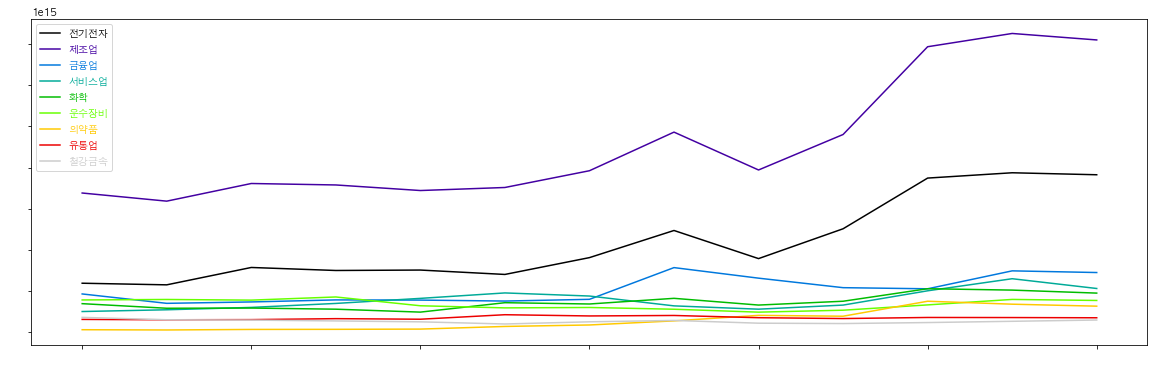

In [73]:
tickers = stock.get_index_ticker_list(market='KOSDAQ')
#'1001','1028','1034','1035'
# '1013', '1027', '1021', '1026', '1008', '1015', '1009', '1016', '1011'
#KOSPI_tickers = [ '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1024', '1025', '1026', '1027']
KOSPI_tickers = ['1013', '1027', '1021', '1026', '1008', '1015', '1009', '1016', '1011']
KOSDAQ_tickers = ['2012', '2015', '2024', '2026', '2027', '2029', '2031', '2037', '2041', '2042', '2043', '2056', '2058', '2062', '2063', '2065', '2066', '2067', '2068', '2070', '2072', '2074', '2075', '2077', '2151', '2152', '2153', '2154', '2155', '2156', '2157', '2158', '2159', '2160']

ticker_list = KOSPI_tickers
colormap = plt.cm.nipy_spectral
colors = [colormap(i) for i in np.linspace(0, 1, len(ticker_list))]
fig, ax1 = plt.subplots()

KOSPI_list = pd.DataFrame()
for index, ticker in enumerate(ticker_list):
    pdf = stock.get_index_portfolio_deposit_file(ticker)
    
    df = stock.get_index_ohlcv("20100501", "20220501", ticker, 'y')
    df = df[['상장시가총액']]
    df[df.columns.name] = df[['상장시가총액']]
    df = df.drop('상장시가총액', axis=1)
    plt.rcParams["figure.figsize"] = (20,6)
    plt.xticks(color='w')
    plt.yticks(color='w')
    ax1.plot(df.index.year, df[[df.columns.name]], label = df.columns.name, color = colors[index])
    KOSPI_list = pd.concat([KOSPI_list, df], axis = 1)

#df = stock.get_index_ohlcv("20100501", "20220501", '1001', 'y')
#ax2 = ax1.twinx()
#ax2.plot(df.index.year , df[['시가']], color = 'red',linewidth = 2.0, linestyle = "--")


ax1.legend(labelcolor='linecolor')
plt.rcParams['font.family'] = 'AppleGothic'
plt.xticks(color='w')
plt.yticks(color='w')
plt.show()

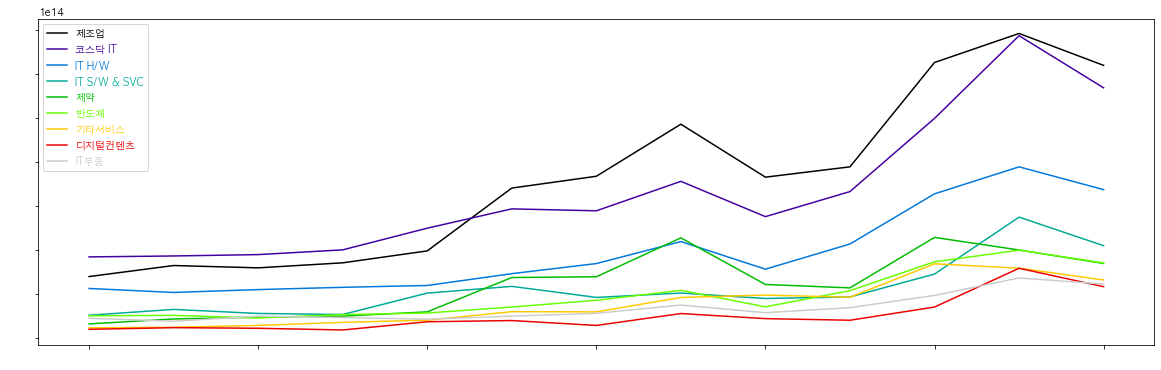

In [71]:

#KOSDAQ_tickers = ['2012', '2015', '2024', '2026', '2027', '2029', '2031', '2037', '2041', '2042', '2043', '2056', '2058', '2062', '2063', '2065', '2066', '2067', '2068', '2070', '2072', '2074', '2075', '2077', '2151', '2152', '2153', '2154', '2155', '2156', '2157', '2158', '2159', '2160']
KOSDAQ_tickers = ['2024', '2015', '2043', '2042', '2066', '2159', '2012', '2154', '2160']
ticker_list = KOSDAQ_tickers

colormap = plt.cm.nipy_spectral
colors = [colormap(i) for i in np.linspace(0, 1, len(ticker_list))]

fig, ax1 = plt.subplots()
KOSDAQ_list = pd.DataFrame()

for index, ticker in enumerate(ticker_list):
    pdf = stock.get_index_portfolio_deposit_file(ticker)
    df = stock.get_index_ohlcv("20100101", "20220228", ticker, 'y')
    df = df[['상장시가총액']]
    df[df.columns.name] = df[['상장시가총액']]
    df = df.drop('상장시가총액', axis=1)
    plt.xticks(color='w')
    plt.yticks(color='w')
    ax1.plot(df.index.year, df[[df.columns.name]], label = df.columns.name, color = colors[index])
    KOSDAQ_list = pd.concat([KOSDAQ_list, df], axis = 1)
ax1.legend(labelcolor='linecolor', loc='upper left')
 
# df = stock.get_index_ohlcv("20100101", "20220228", '2001', 'y')
# ax2 = ax1.twinx()
# ax2.plot(df.index.year, df[['시가']], color = 'red',linewidth = 2.0, linestyle = "--")   


plt.rcParams['font.family'] = 'AppleGothic'
plt.xticks(color='w')
plt.yticks(color='w')
plt.show()

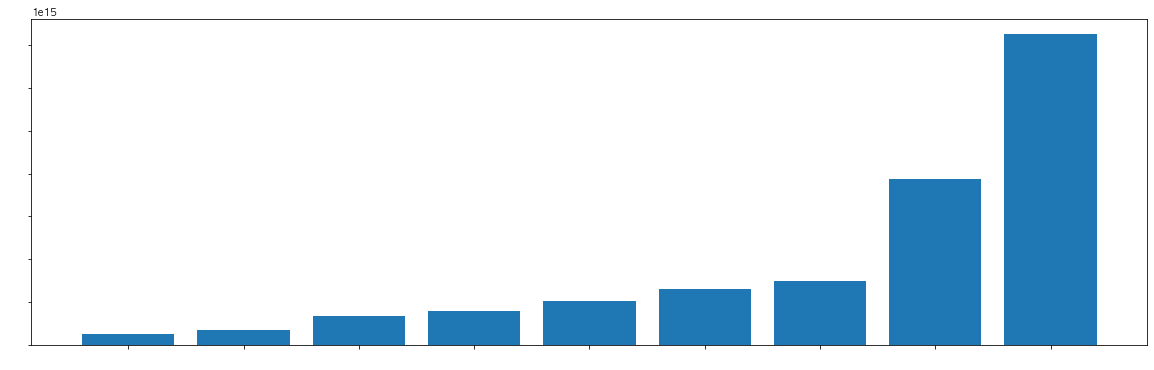

In [74]:
KOSPI = KOSPI_list.loc['2021-12-31'].sort_values()[-10:]
#KOSDAQ = KOSDAQ_list.loc['2022-12-31'].sort_values()[-10:]
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["figure.figsize"] = (20,6)

#plt.xticks(color='w')
#plt.yticks(color='w')
#plt.bar(KOSPI.index.to_list(), KOSPI)
#plt.show()

plt.bar(KOSPI.index.to_list(), KOSPI)
plt.xticks(color='w')
plt.yticks(color='w')
plt.show()

In [4]:
krx = KrxReader()
company_df = krx.listed_company()
dataframe = krx.read_date('2009-07-01', kor=True)

In [13]:

headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

url_upjong = "https://finance.naver.com/sise/sise_group.naver?type=upjong"
res = requests.get(url_upjong, headers=headers)
page_soup = BeautifulSoup(res.text, "lxml")
summary_html = page_soup.select('td a')

upjong_list = pd.DataFrame(re.findall('no=(.+?)">(.+?)</a>',str(summary_html)))
upjong_list = upjong_list.rename(columns={0:"no",1:"upjong"}).sort_values(by=['upjong']).reset_index(drop=True)
upjong_list.no = upjong_list.no.str.zfill(3)

request_upjong_url = "https://finance.naver.com/sise/field_submit.naver?menu=upjong&returnUrl=http%3A%2F%2Ffinance.naver.com%2Fsise%2Fsise_group_detail.naver%3Ftype%3Dupjong%26no%3D"
request_url1 = "&fieldIds=market_sum&fieldIds=property_total&fieldIds=debt_total&fieldIds=sales"
request_url2 = "&fieldIds=operating_profit&fieldIds=net_income&fieldIds=eps&fieldIds=dividend"

upjong = pd.DataFrame()
for i in (upjong_list['no'].to_list()):
    temp = pd.DataFrame()
    for j in ([request_url1,request_url2]):
        res = requests.get(request_upjong_url+i+j, headers=headers)
        page_soup = BeautifulSoup(res.text, "lxml")
        upjong_data_html = page_soup.select_one('#contentarea > div:nth-child(5)')
        col = [item.get_text().strip() for item in upjong_data_html.select('thead th')]
        col = [x for x in col if x not in ['종목명','토론실']]
        row = [item.get_text().strip() for item in upjong_data_html.select('tbody a')]
        row = list(filter(None,row))
        num = np.array([item.get_text().strip() for item in upjong_data_html.select('td.number')])
        num.resize(len(row),len(col))
        df = pd.DataFrame(num, columns=col,index=row).drop(columns=['현재가','전일비','등락률'])
        df['Sector'] = upjong_list[upjong_list.no==i].upjong.iat[0]
        temp = pd.concat([temp,df], axis = 1)

    upjong = pd.concat([upjong,temp], axis = 0)
    
with pd.ExcelWriter('upjong.xlsx', engine='openpyxl') as writer:
    upjong.to_excel(writer)

KeyboardInterrupt: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 196 to 1064
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   종목명_x    506 non-null    object
 1   시장구분_x   506 non-null    object
 2   업종명      506 non-null    object
 3   상장주식수_x  506 non-null    int64 
 4   업종코드     506 non-null    object
 5   시가총액     506 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.7+ KB
None


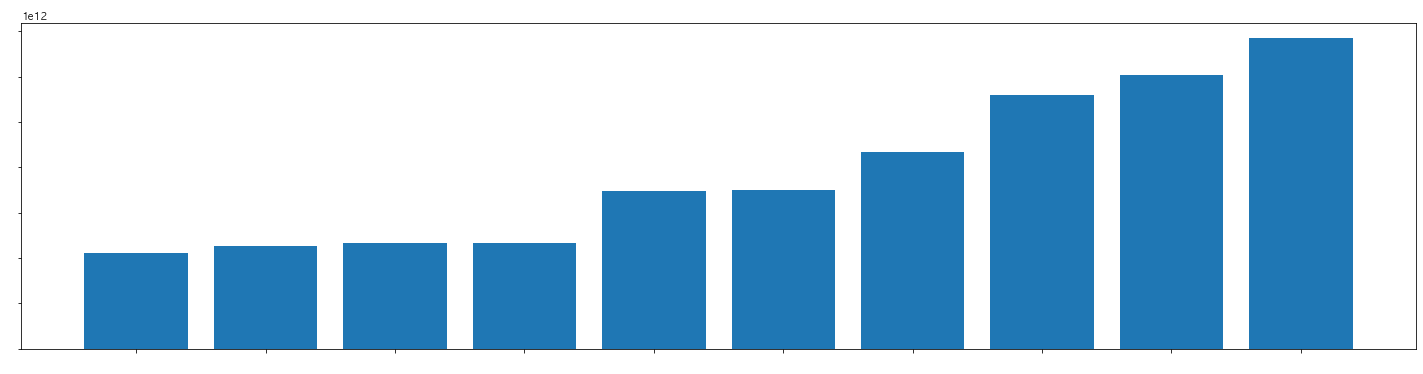

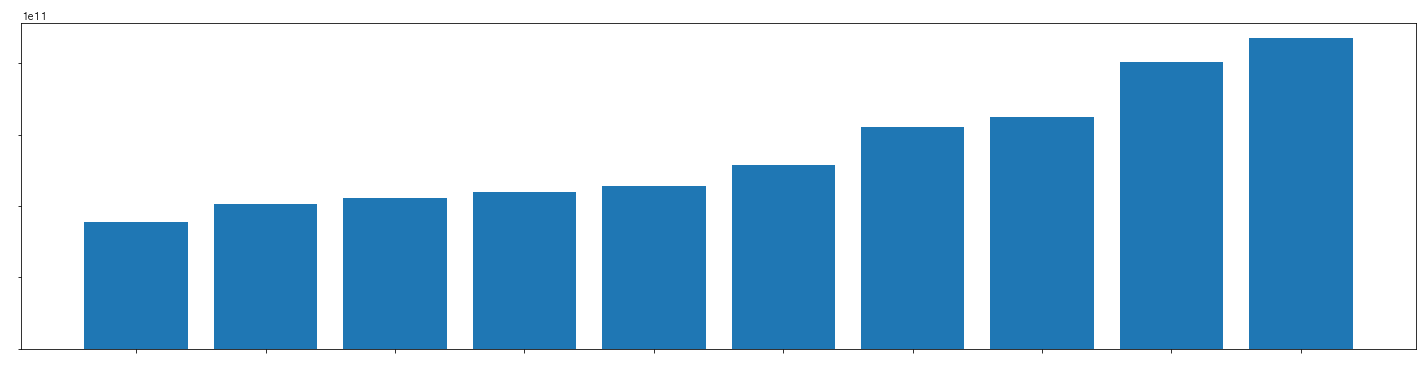

In [19]:
listed_company_df = pd.merge(company_df, dataframe, on='종목코드', how='inner')
filtered_companies = listed_company_df[['종목명_x', '시장구분_x', '업종명', '상장주식수_x','업종코드', '시가총액']]

#KOSPI
KOSPI_companies = filtered_companies[filtered_companies['시장구분_x']=="KOSPI"].sort_values(by=['시가총액'])
df =  KOSPI_companies['시가총액']
fig = px.histogram(df, x="시가총액")
fig.show()


KOSPI_companies = KOSPI_companies.loc[KOSPI_companies['시가총액'] < 10**12] 
KOSPI_groupby_sum = KOSPI_companies.groupby('업종명')['시가총액'].agg(시가총액='sum', MyCount='count').sort_values(by=['시가총액'])
print(KOSPI_companies.info())

KOSPI_groupby_mean = KOSPI_companies.groupby('업종명').mean().sort_values(by=['시가총액'])

KOSPI_groupby_sum = KOSPI_groupby_sum[-10:]
KOSPI_groupby_mean = KOSPI_groupby_mean[-10:]

plt.bar(KOSPI_groupby_sum.index.to_list(), KOSPI_groupby_sum['시가총액'].to_list())
plt.title('10조이상 기업들의 업종별 시가총액 합')
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['text.color'] = 'white'
plt.rcParams["figure.figsize"] = (25,6)
plt.xticks(color='w')
plt.yticks(color='w')
plt.show()

plt.bar(KOSPI_groupby_mean.index.to_list(), KOSPI_groupby_mean['시가총액'].to_list())
plt.title('10조이상 기업들의 업종별 시가총액 평균')
plt.rcParams["figure.figsize"] = (25,6)
plt.xticks(color='w')
plt.yticks(color='w')
plt.show()
#plt.hist(KOSPI_groupby_sum['매출액'].to_list())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 708 to 106
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   종목명_x    578 non-null    object
 1   시장구분_x   578 non-null    object
 2   업종명      578 non-null    object
 3   상장주식수_x  578 non-null    int64 
 4   업종코드     578 non-null    object
 5   시가총액     578 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 31.6+ KB
None


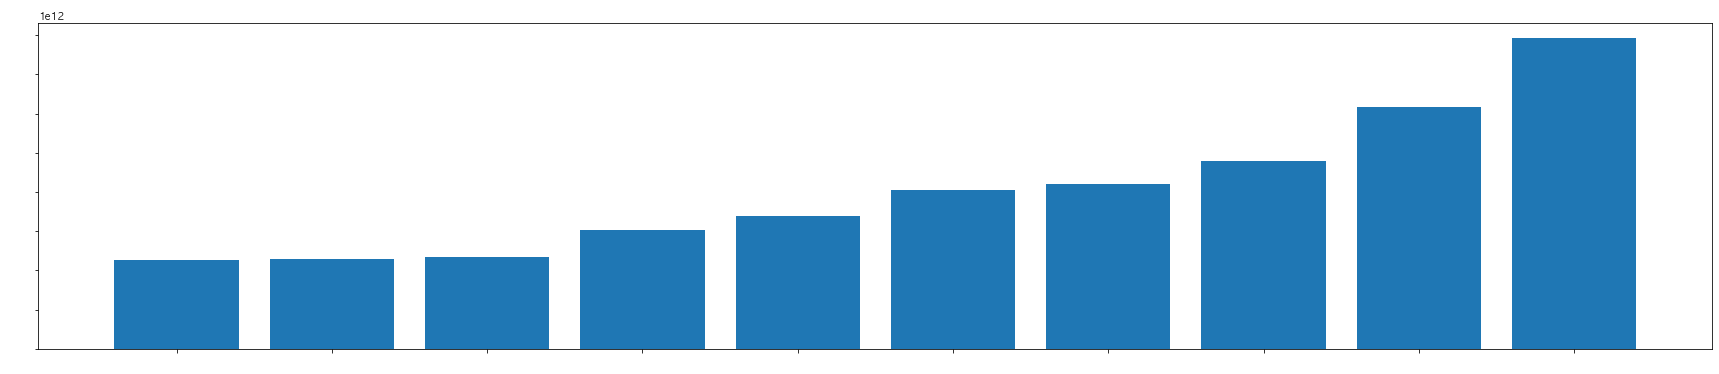

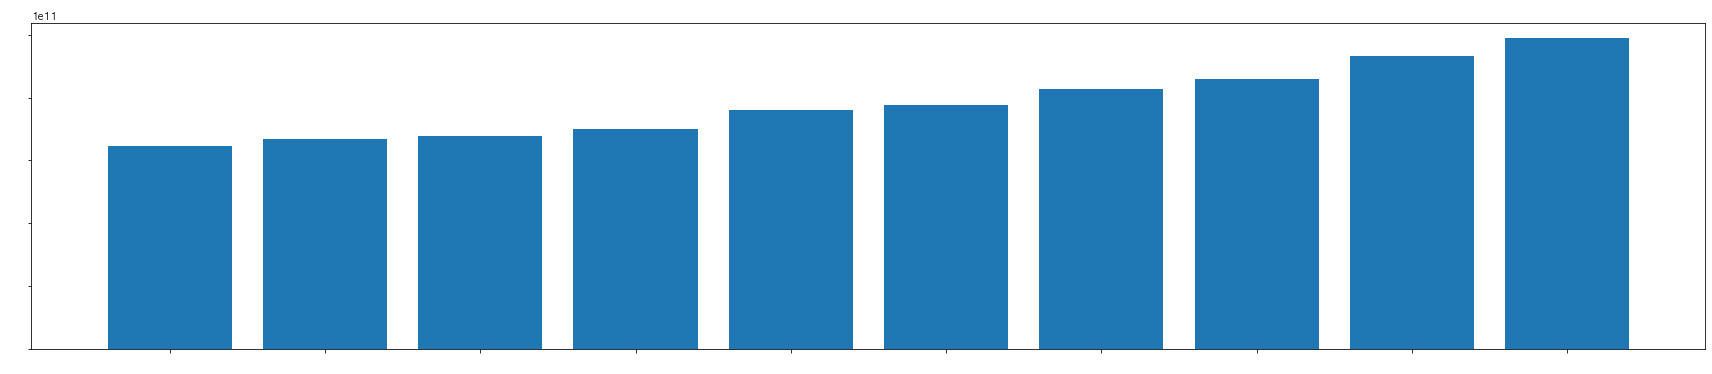

In [33]:
listed_company_df = pd.merge(company_df, dataframe, on='종목코드', how='inner')
filtered_companies = listed_company_df[['종목명_x', '시장구분_x', '업종명', '상장주식수_x','업종코드', '시가총액']]
#KOSPI
KOSDAQ_companies = filtered_companies[filtered_companies['시장구분_x']=="KOSDAQ"].sort_values(by=['시가총액'])
df =  KOSDAQ_companies['시가총액']
fig = px.histogram(df, x="시가총액")
fig.show()

KOSDAQ_companies = filtered_companies[filtered_companies['시장구분_x']=="KOSDAQ"].sort_values(by=['시가총액'])

KOSDAQ_companies = KOSDAQ_companies.loc[KOSDAQ_companies['시가총액'] < 10**11]
print(KOSDAQ_companies.info())

KOSDAQ_groupby_sum = KOSDAQ_companies.groupby('업종명')['시가총액'].agg(시가총액='sum', MyCount='count').sort_values(by=['시가총액'])
KOSDAQ_groupby_mean = KOSDAQ_companies.groupby('업종명').mean().sort_values(by=['시가총액'])


KOSDAQ_groupby_sum = KOSDAQ_groupby_sum[-10:]
KOSDAQ_groupby_mean = KOSDAQ_groupby_mean[-10:]

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['text.color'] = 'white'
plt.rcParams["figure.figsize"] = (30,6)
plt.xticks(color='w')
plt.yticks(color='w')


plt.bar(KOSDAQ_groupby_sum.index.to_list(), KOSDAQ_groupby_sum['시가총액'].to_list())
plt.title('1조 5천억이상 기업들의 업종별 시가총액 합')
plt.show()

plt.bar(KOSDAQ_groupby_mean.index.to_list(), KOSDAQ_groupby_mean['시가총액'].to_list())
plt.title('1조 5천억이상 기업들의 업종별 시가총액 평균')

plt.xticks(color='w')
plt.yticks(color='w')
plt.show()
#plt.hist(KOSDAQ_groupby_sum['매출액'].to_list())

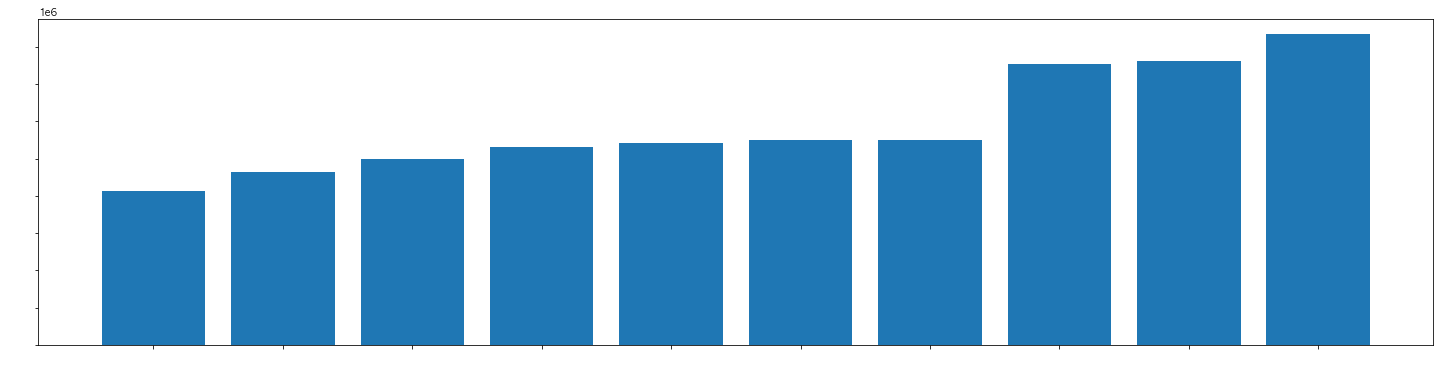

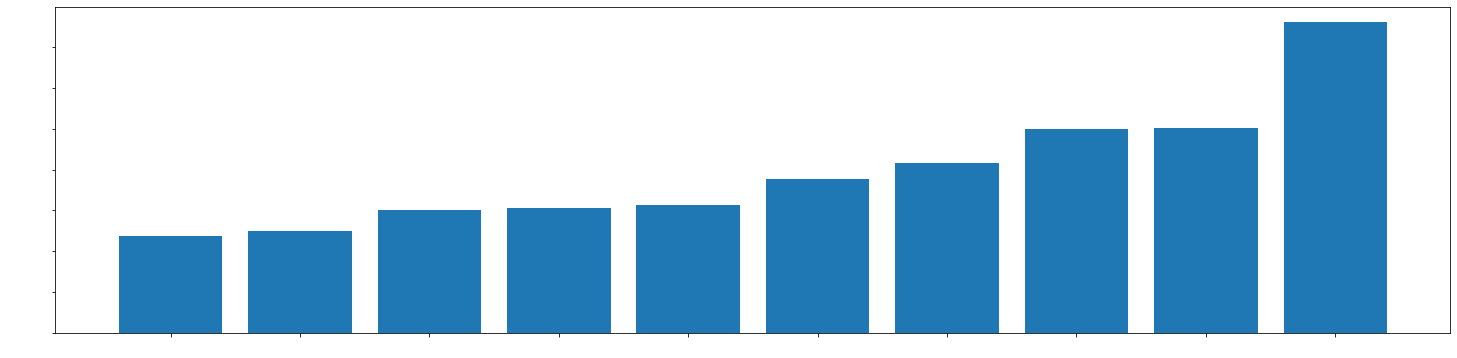

In [18]:

upjong = pd.read_excel('upjong_merged.xlsx', engine='openpyxl')

filtered_companies = upjong[['종목명', '시장구분', '영업이익', '시가총액', 'Sector','매출액']]

KOSPI_companies = filtered_companies[filtered_companies['시장구분'] == "KOSPI"]

KOSPI_companies = KOSPI_companies.apply(lambda x: x.str.replace(',', ''))
KOSPI_companies['영업이익'] = pd.to_numeric(KOSPI_companies['영업이익'])
KOSPI_companies['매출액'] = pd.to_numeric(KOSPI_companies['매출액'])

KOSPI_companies = KOSPI_companies.dropna()
KOSPI_companies = KOSPI_companies.sort_values(by=['매출액'])
#KOSPI_companies = KOSPI_companies.loc[KOSPI_companies['매출액'] < 10**6] 


KOSPI_groupby_sum = KOSPI_companies.groupby('Sector')['매출액'].agg(매출액='sum').sort_values(by=['매출액'])#,  MyCount='count'
KOSPI_groupby_mean = KOSPI_companies.groupby('Sector')['매출액'].agg(매출액='mean').sort_values(by=['매출액'])#,  MyCount='count'

KOSPI_groupby_sum = KOSPI_groupby_sum[-10:]
KOSPI_groupby_mean = KOSPI_groupby_mean[-10:]

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['text.color'] = 'white'
plt.rcParams["figure.figsize"] = (25,6)
plt.xticks(color='w')
plt.yticks(color='w')


plt.bar(KOSPI_groupby_sum.index.to_list(), KOSPI_groupby_sum['매출액'].to_list())
plt.show()

plt.bar(KOSPI_groupby_mean.index.to_list(), KOSPI_groupby_mean['매출액'].to_list())
plt.xticks(color='w')
plt.yticks(color='w')
plt.show()

In [38]:

upjong = pd.read_excel('upjong_merged.xlsx', engine='openpyxl')

filtered_companies = upjong[['종목명', '시장구분', '영업이익', '시가총액', 'Sector','매출액']]

KOSDAQ_companies = filtered_companies[filtered_companies['시장구분'] == "KOSDAQ"]

KOSDAQ_companies = KOSDAQ_companies.apply(lambda x: x.str.replace(',', ''))
KOSDAQ_companies['영업이익'] = pd.to_numeric(KOSDAQ_companies['영업이익'])
KOSDAQ_companies['매출액'] = pd.to_numeric(KOSDAQ_companies['매출액'])

KOSDAQ_companies = KOSDAQ_companies.dropna()
KOSDAQ_companies = KOSDAQ_companies.sort_values(by=['매출액'])
#KOSDAQ_companies = KOSDAQ_companies.loc[KOSDAQ_companies['매출액'] < 10**6] 


KOSDAQ_groupby_sum = KOSDAQ_companies.groupby('Sector')['매출액'].agg(매출액='sum').sort_values(by=['매출액'])#,  MyCount='count'
KOSDAQ_groupby_mean = KOSDAQ_companies.groupby('Sector')['매출액'].agg(매출액='mean').sort_values(by=['매출액'])#,  MyCount='count'

KOSDAQ_groupby_sum = KOSDAQ_groupby_sum[-10:]
KOSDAQ_groupby_mean = KOSDAQ_groupby_mean[-10:]

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['text.color'] = 'white'
plt.rcParams["figure.figsize"] = (25,6)
plt.xticks(color='w')
plt.yticks(color='w')


plt.bar(KOSDAQ_groupby_sum.index.to_list(), KOSDAQ_groupby_sum['매출액'].to_list())
plt.show()

plt.bar(KOSDAQ_groupby_mean.index.to_list(), KOSDAQ_groupby_mean['매출액'].to_list())
plt.xticks(color='w')
plt.yticks(color='w')
plt.show()

KeyError: '시가총액'

([<matplotlib.patches.Wedge at 0x122978610>,
 [Text(-0.6465637441936393, 0.8899187180267096, '폐업'),
  Text(0.46835712939770546, -0.9953098006863699, ' '),
  Text(1.0735084126331969, -0.23995767961404013, 'M&A'),
  Text(1.0994572127872129, -0.03455195001984181, 'I PO')])

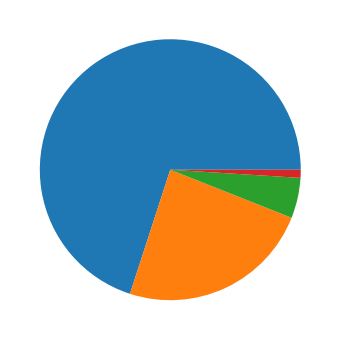

In [43]:
# Start writing code here...
import pandas as pd

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["figure.figsize"] = (10,6)
plt.xticks(color='w')
plt.yticks(color='w')
plt.pie( [70, 24, 5, 1], labels=['폐업',' ','M&A','I PO'])

In [ ]:
# Start writing code here...
import pandas as pd
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["figure.figsize"] = (10,6)
plt.xticks(color='w')
plt.yticks(color='w')
plt.bar(['전체','IPO','M&A','폐업'], [2356, 824, 1532, 91])